In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [9]:
num_cols=['Year','Price']

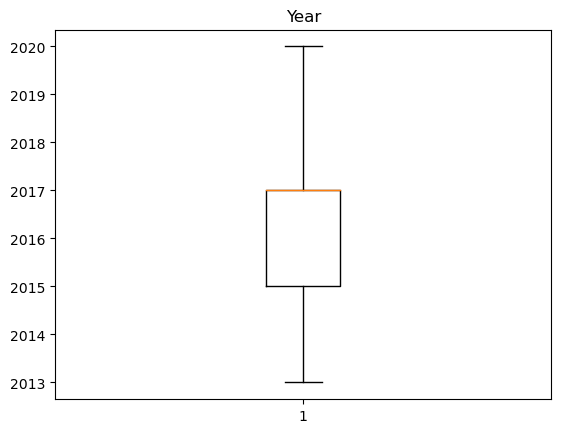

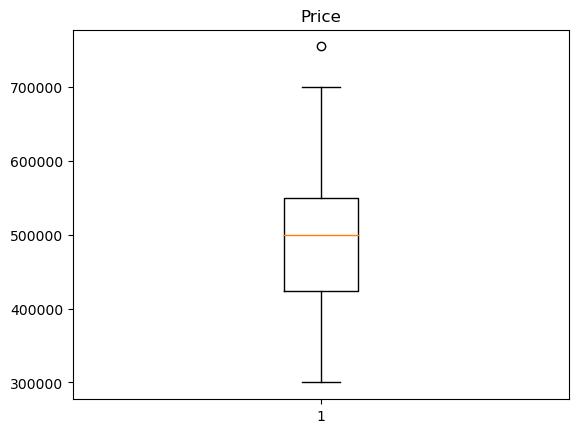

In [10]:
for i in num_cols:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

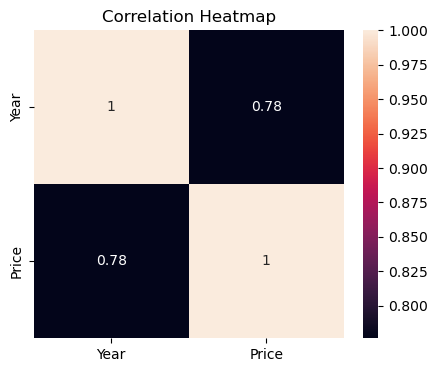

In [12]:
corrmatrix = data.corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corrmatrix,annot = True)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [15]:
y = data ['Price']   # target variable
X= data.drop(['Price'],axis = 1) # features

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
print('X_train\n' , X_train.head())
print('X_test\n' , X_test.head())

X_train
     Year
81  2014
77  2015
15  2017
30  2019
45  2018
X_test
     Year
40  2019
65  2017
4   2018
47  2018
42  2018


In [18]:
lr = LinearRegression()
linear_model = lr.fit(X_train,y_train)

In [19]:
y_predict_linear = linear_model.predict(X_test)

In [20]:

linear_mse = mean_squared_error(y_test,y_predict_linear)
linear_r2 = r2_score(y_test,y_predict_linear)

print(linear_mse)
print(linear_r2)

3878767151.073449
0.4347961632108023


In [21]:
# Create and train the Lasso regression model:

l = Lasso()
lasso_model = l.fit(X_train, y_train)

In [22]:
y_predict_lasso = lasso_model.predict(X_test)

In [23]:
y_predict_lasso

array([599222.10828854, 505264.87581331, 552243.49205092, 552243.49205092,
       552243.49205092, 411307.64333805, 505264.87581331, 552243.49205092,
       599222.10828854, 599222.10828854, 317350.4108628 , 505264.87581331,
       411307.64333805, 646200.72452617, 552243.49205092, 599222.10828854,
       317350.4108628 , 411307.64333805, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 505264.87581331, 505264.87581331,
       505264.87581331, 505264.87581331, 411307.64333805, 411307.64333805])

In [24]:
lasso_mse = mean_squared_error(y_test,y_predict_lasso)
lasso_r2 = r2_score(y_test,y_predict_lasso)

print(lasso_mse)
print(lasso_r2)

3878735896.222091
0.4348007175862566


In [25]:
print("Linear Regression MSE:", linear_mse)
print("Linear Regression R2 Score:", linear_r2)
print("Lasso Regression MSE:", lasso_mse)
print("Lasso Regression R2 Score:", lasso_r2)

Linear Regression MSE: 3878767151.073449
Linear Regression R2 Score: 0.4347961632108023
Lasso Regression MSE: 3878735896.222091
Lasso Regression R2 Score: 0.4348007175862566


In [27]:
model_price2022=lr.predict([[2022]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
model_price2022

array([740160.11937766])